In [59]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [60]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")
payment["TransactionDate"]=pd.to_datetime(pd.to_datetime(payment["TransactionDate"]).dt.date)
payment["PaymentDate"]=pd.to_datetime(pd.to_datetime(payment["PaymentDate"]).dt.date)

In [61]:
sel=payment[payment.SellerId==6][["TransactionDate","Amount"]]
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="M")).sum()
sel["Amount"]=sel.Amount.apply(lambda x:int(x))
ts=sel["Amount"]

In [62]:
ts.head()

TransactionDate
2018-07-31    5409100
2018-08-31    4636300
2018-09-30    5575000
2018-10-31    7517500
2018-11-30    4119162
Freq: M, Name: Amount, dtype: int64

In [63]:
ts.tail()

TransactionDate
2019-01-31    27874703
2019-02-28     8196776
2019-03-31    16678400
2019-04-30    16455700
2019-05-31     1500000
Freq: M, Name: Amount, dtype: int64

In [73]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

In [74]:
data=list()

In [75]:
for i in ts:
    v1=i+ random()
    v2=v1+random()
    row=[v1,v2]
    data.append(row)

In [76]:
data.append(row)

In [77]:
model = VAR(data)
model_fit = model.fit()

In [80]:
data

[[5409100.286052903, 5409100.499031992],
 [4636300.541936689, 4636300.683652862],
 [5575000.15831139, 5575000.387755487],
 [7517500.281611239, 7517500.322751],
 [4119162.351729623, 4119162.8465696163],
 [600000.1779859615, 600001.0140234819],
 [27874703.83766116, 27874704.26024441],
 [8196776.11205525, 8196776.879593346],
 [16678400.953742113, 16678401.257965375],
 [16455700.228500241, 16455700.549974317],
 [1500000.8930557992, 1500001.6473990928],
 [1500000.8930557992, 1500001.6473990928]]

In [82]:
forecast=model_fit.forecast(model_fit.y, steps=1)

**Holts winter Exponential forecast for low data points series**

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(ts)
model_fit = model.fit()

In [54]:
forecast=model_fit.predict("2019-06-30", "2019-12-31")

In [56]:
forecast.apply(lambda x: int(x))

2019-06-30    8785055
2019-07-31    8785055
2019-08-31    8785055
2019-09-30    8785055
2019-10-31    8785055
2019-11-30    8785055
2019-12-31    8785055
Freq: M, dtype: int64

In [40]:
def pred_fin(predicted, train):
    c=pd.Index(predicted.index)
    c=c.insert(0, pd.to_datetime(train.index[-1]))
    lis=list(predicted.values)
    lis.insert(0,train[-1])
    lis=pd.Series(lis,index=c)
    prediction_final=lis.apply(lambda x:int(x))
    return prediction_final

In [41]:
final_forecast=pred_fin(forecast, ts)

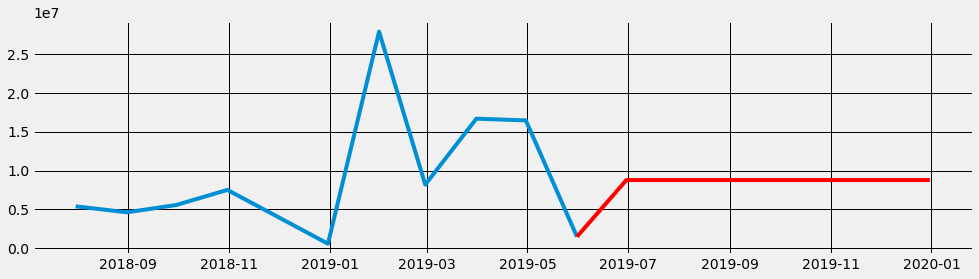

In [43]:
plt.figure(figsize=(15,4))
plt.plot(ts)
plt.plot(final_forecast, color="red")
plt.grid(True, color="black")
plt.show()

**Simple exponential forecast**

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [45]:
model = SimpleExpSmoothing(ts)
model_fit = model.fit()

In [48]:
ts.tail()

TransactionDate
2019-01-31    27874703
2019-02-28     8196776
2019-03-31    16678400
2019-04-30    16455700
2019-05-31     1500000
Freq: M, Name: Amount, dtype: int64

In [49]:
pred=model_fit.predict("2019-06-30", "2019-12-31")

In [51]:
final_forecast=pred_fin(forecast, ts)

In [52]:
final_forecast

2019-05-31    1500000
2019-06-30    8785055
2019-07-31    8785055
2019-08-31    8785055
2019-09-30    8785055
2019-10-31    8785055
2019-11-30    8785055
2019-12-31    8785055
Freq: M, dtype: int64

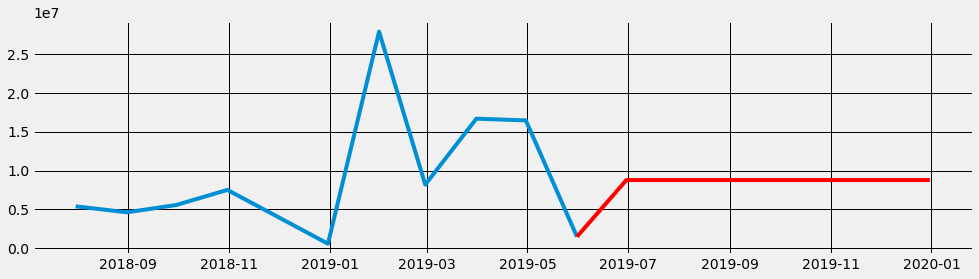

In [53]:
plt.figure(figsize=(15,4))
plt.plot(ts)
plt.plot(final_forecast, color="red")
plt.grid(True, color="black")
plt.show()